In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV,KFold
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 42A7-BDFB

 Directory of C:\Users\Narasimhulu E\Documents\Assingnments\Neural Networks

06/06/2023  10:59 PM    <DIR>          .
06/06/2023  11:08 AM    <DIR>          ..
06/05/2023  03:05 PM    <DIR>          .ipynb_checkpoints
06/06/2023  10:57 PM                73 checkpoint
06/05/2023  03:06 PM            46,843 forestfires (2).csv
06/05/2023  03:06 PM         1,155,536 gas_turbines (1).csv
06/06/2023  10:57 PM             6,616 mywt.kmw.data-00000-of-00001
06/06/2023  10:57 PM             1,276 mywt.kmw.index
06/06/2023  10:59 PM           108,066 Neural Networks (Gas .Turbines).ipynb
06/05/2023  06:16 PM           230,015 NEURAL NETWORKS(Forest.fires).ipynb
06/05/2023  03:06 PM             1,130 problem statment(Gas turbines) (1).txt
06/05/2023  03:06 PM                61 Problem_statement(fireforests) (1).txt
               9 File(s)      1,549,616 bytes
               3 Dir(s)  16,184,623,104 bytes free


In [3]:
gt=pd.read_csv('gas_turbines (1).csv')

In [4]:
gt

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


# EDA

In [5]:
gt.shape

(15039, 11)

In [6]:
gt.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [7]:
gt=gt.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO',
       'NOX','TEY']]

In [8]:
gt

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559,111.61
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917,111.78
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912,110.19
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227,110.74


# Testing and Training the data

In [9]:
x=gt.iloc[:,0:-1]
y=gt.iloc[:,-1]

In [10]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [11]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [12]:
gt.shape

(15039, 11)

In [13]:
gt.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
TEY     0
dtype: int64

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [15]:
x_train

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
6041,18.8170,1019.0,75.406,4.1596,24.514,1087.1,550.05,11.931,1.298400,64.625
11993,31.7890,1007.9,56.296,4.4652,29.667,1100.0,542.04,13.145,0.003665,54.238
7265,9.1420,1026.3,56.230,2.8716,23.791,1084.9,550.03,11.759,1.677000,77.812
1865,18.7080,1003.6,71.792,4.7918,25.133,1087.4,549.86,12.092,1.173600,71.426
9285,12.3350,1022.5,59.299,5.6196,32.129,1099.8,529.98,13.924,0.624170,64.572
...,...,...,...,...,...,...,...,...,...,...
11633,32.1610,1010.8,41.753,3.9491,26.042,1092.9,550.33,12.169,0.825400,67.069
1344,17.8610,1014.2,55.208,3.9475,19.743,1056.7,549.83,10.508,3.449100,79.565
12815,27.4210,1012.2,65.671,4.0946,25.955,1093.2,549.77,12.239,0.193070,61.828
7293,7.1961,1022.2,88.675,2.8258,23.618,1083.8,550.02,11.777,1.960800,77.198


In [16]:
y_train

6041     132.04
11993    145.70
7265     133.74
1865     133.74
9285     158.88
          ...  
11633    132.77
1344     110.43
12815    133.74
7293     134.10
1289     111.06
Name: TEY, Length: 12031, dtype: float64

In [17]:
x_test

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
14339,6.9070,1024.8,91.648,3.4800,19.543,1045.7,540.83,10.704,6.32300,97.258
7104,8.1697,1012.1,93.123,2.9453,25.339,1087.5,546.19,12.316,1.37440,74.193
1552,9.2776,1016.7,97.436,5.0183,22.842,1070.4,546.79,11.472,2.82630,85.508
2382,17.7460,1003.9,91.306,5.3576,25.102,1088.0,550.14,11.852,1.89420,70.341
4988,25.4500,1012.5,76.836,4.3863,25.838,1092.4,550.03,12.217,1.43320,64.696
...,...,...,...,...,...,...,...,...,...,...
13377,26.6840,1007.4,63.631,4.1917,26.371,1095.9,550.09,12.342,0.58277,65.896
10503,20.4740,1014.5,84.442,4.5426,31.696,1099.5,533.22,13.649,1.15020,58.577
14798,14.8760,1004.8,92.184,3.6012,19.941,1059.5,550.01,10.701,3.30250,71.934
4626,28.1800,1016.6,49.692,3.5504,20.603,1062.0,550.10,10.729,2.84880,53.168


In [18]:
y_test

14339    113.01
7104     140.51
1552     125.93
2382     133.71
4988     134.01
          ...  
13377    135.75
10503    153.30
14798    114.39
4626     110.76
9937     160.27
Name: TEY, Length: 3008, dtype: float64

# CREATING MODEL

In [19]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_dim=10,activation='ReLU'))
model.add(tf.keras.layers.Dense(10,activation='ReLU'))
model.add(tf.keras.layers.Dense(1,activation='ReLU'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 336
Trainable params: 336
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='mse',optimizer='adam',metrics=['mse','mae'])

In [22]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=1000)

Epoch 1/50
13/13 [==============================] - 1s 17ms/step - loss: 229425.9219 - mse: 229425.9219 - mae: 476.9278 - val_loss: 154615.0156 - val_mse: 154615.0156 - val_mae: 392.8039
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 114777.6016 - mse: 114777.6016 - mae: 336.6073 - val_loss: 71778.0078 - val_mse: 71778.0078 - val_mae: 267.3074
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 50873.4180 - mse: 50873.4180 - mae: 223.2732 - val_loss: 29430.2129 - val_mse: 29430.2129 - val_mae: 170.5876
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 19830.8164 - mse: 19830.8164 - mae: 138.3155 - val_loss: 10875.3535 - val_mse: 10875.3535 - val_mae: 102.8034
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 8067.4912 - mse: 8067.4912 - mae: 87.7745 - val_loss: 5442.0854 - val_mse: 5442.0854 - val_mae: 71.7647
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 4151.6870 - mse: 

13/13 [==============================] - 0s 6ms/step - loss: 288.2948 - mse: 288.2948 - mae: 12.6546 - val_loss: 292.2841 - val_mse: 292.2841 - val_mae: 12.8464
Epoch 49/50
13/13 [==============================] - 0s 5ms/step - loss: 288.1220 - mse: 288.1220 - mae: 12.6521 - val_loss: 292.1256 - val_mse: 292.1256 - val_mae: 12.8380
Epoch 50/50
13/13 [==============================] - 0s 5ms/step - loss: 287.8958 - mse: 287.8958 - mae: 12.6408 - val_loss: 291.9940 - val_mse: 291.9940 - val_mae: 12.8289


In [23]:
model.save_weights("mywt.kmw")

In [24]:
scores=model.evaluate(x_train,y_train)
print("%s: %.2f%%" %(model.metrics_names[1],scores[1]*100))

376/376 [==============================] - 0s 975us/step - loss: 287.7705 - mse: 287.7705 - mae: 12.6364
mse: 28777.05%


In [25]:
history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

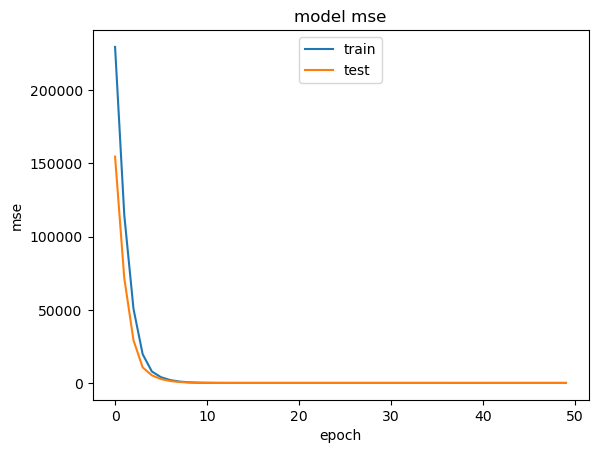

In [26]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper center')
plt.show()

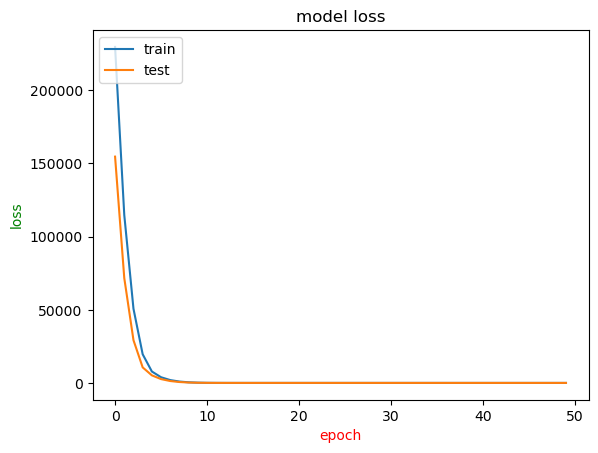

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss',color='green')
plt.xlabel('epoch',color='red')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)
train_rmse=mean_squared_error(y_train,y_train_pred,squared=False)
test_rmse=mean_squared_error(y_test,y_test_pred,squared=False)
print('Training set rmse: %.7f, Testing set rmse: %.7f' %(train_rmse,test_rmse))


94/94 [==============================] - 0s 964us/step
Training set rmse: 16.9637964, Testing set rmse: 17.0878315


# RANDOMZIED SEARCH CV

In [29]:
def keras_reg_model(learning_rate,activation_function,init,neuron1,neuron2):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(neuron1,input_dim = 10,kernel_initializer=init,activation=activation_function))
    model.add(tf.keras.layers.Dense(neuron2,input_dim = neuron1,kernel_initializer=init,activation=activation_function))
    model.add(tf.keras.layers.Dense(1,activation = 'linear'))
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'mse',optimizer = adam,metrics= ['mse','mae'])
    return model

In [30]:
keras_reg = KerasRegressor(build_fn=keras_reg_model,verbose = 0)

In [ ]:
batch_size = [10,50,100,500,1000,2000]
epochs = [25,50,80,100,160]
learning_rate = [0.001,0.01,0.1]

activation_function = ['rbf','sigmoid','linear']
init = ['uniform','normal','zero']
neuron1 = [5,10,20,30]
neuron2 = [5,10,20,30]

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,
                  activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

random_search  = RandomizedSearchCV(estimator= keras_reg,param_distributions= param_grids,cv=5,n_jobs=-1,verbose=10
                                   ,random_state=35)
random_result = random_search.fit(x_train,y_train)

In [ ]:
print('Best score:',random_result.best_score_)
print('Best parameters:',random_result.best_params_)

In [ ]:
d1 = random_result.best_params_

keras_tuned = keras_reg_model(learning_rate=d1['learning_rate'],activation_function=d1['activation_function'],init=d1['init'],
                                                                                          neuron1=d1['neuron1'],neuron2=d1['neuron2'])
history2=keras_tuned.fit(x_train,y_train,validation_data=(x_test,y_test),
                        epochs =d1['epochs'],batch_size=d1['batch_size'])

In [ ]:
y_train_pred_tuned=keras_tuned.predict(x_train)
y_test_pred_tuned = keras_tuned.predict(x_test)

train_rmse_tuned = mean_squared_error(y_train,y_train_pred_tuned,squared=False)
test_rmse_tuned = mean_squared_error(y_test,y_test_pred_tuned,squared=False)

print('Training set rmse : %.3f,Testing set rmse: %.3f' %(train_rmse_tuned,test_rmse_tuned))

In [ ]:
result=pd.DataFrame({'models':['base model','tuned model'],'train rmse':[train_rmse,train_rmse_tuned]
                    ,'test rmse':[test_rmse,test_rmse_tuned]})
result